In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats import diagnostic
raw_data = pd.read_csv('data/kc_house_data.csv', index_col=0)

In [2]:
raw_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# after checking on datas which affecting the price(target variable) is bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition
# grade,sqft_above an yr_built

In [4]:
desired_columns = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','sqft_above','yr_built']
data = raw_data[desired_columns]

In [5]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built
id,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1955
6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1951
5631500400,180000.0,2,1.00,770,10000,1.0,3,6,770,1933
2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1965
1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1987


In [6]:
data.reset_index(drop=True, inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1955
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1951
2,180000.0,2,1.00,770,10000,1.0,3,6,770,1933
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1965
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1987


In [7]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,3.409825,7.657915,1788.596842,1970.999676
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,827.759761,29.375234
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,370.000000,1900.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1560.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,4.000000,8.000000,2210.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,2015.000000


In [8]:
# checking for null values
print(data.isnull().sum())

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
condition      0
grade          0
sqft_above     0
yr_built       0
dtype: int64


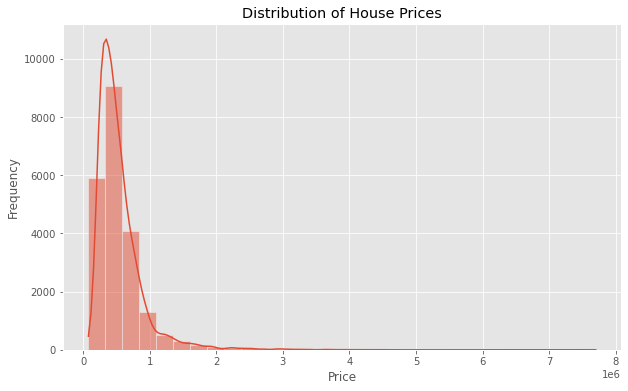

In [9]:
## Distribution of the target variable 'price'
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

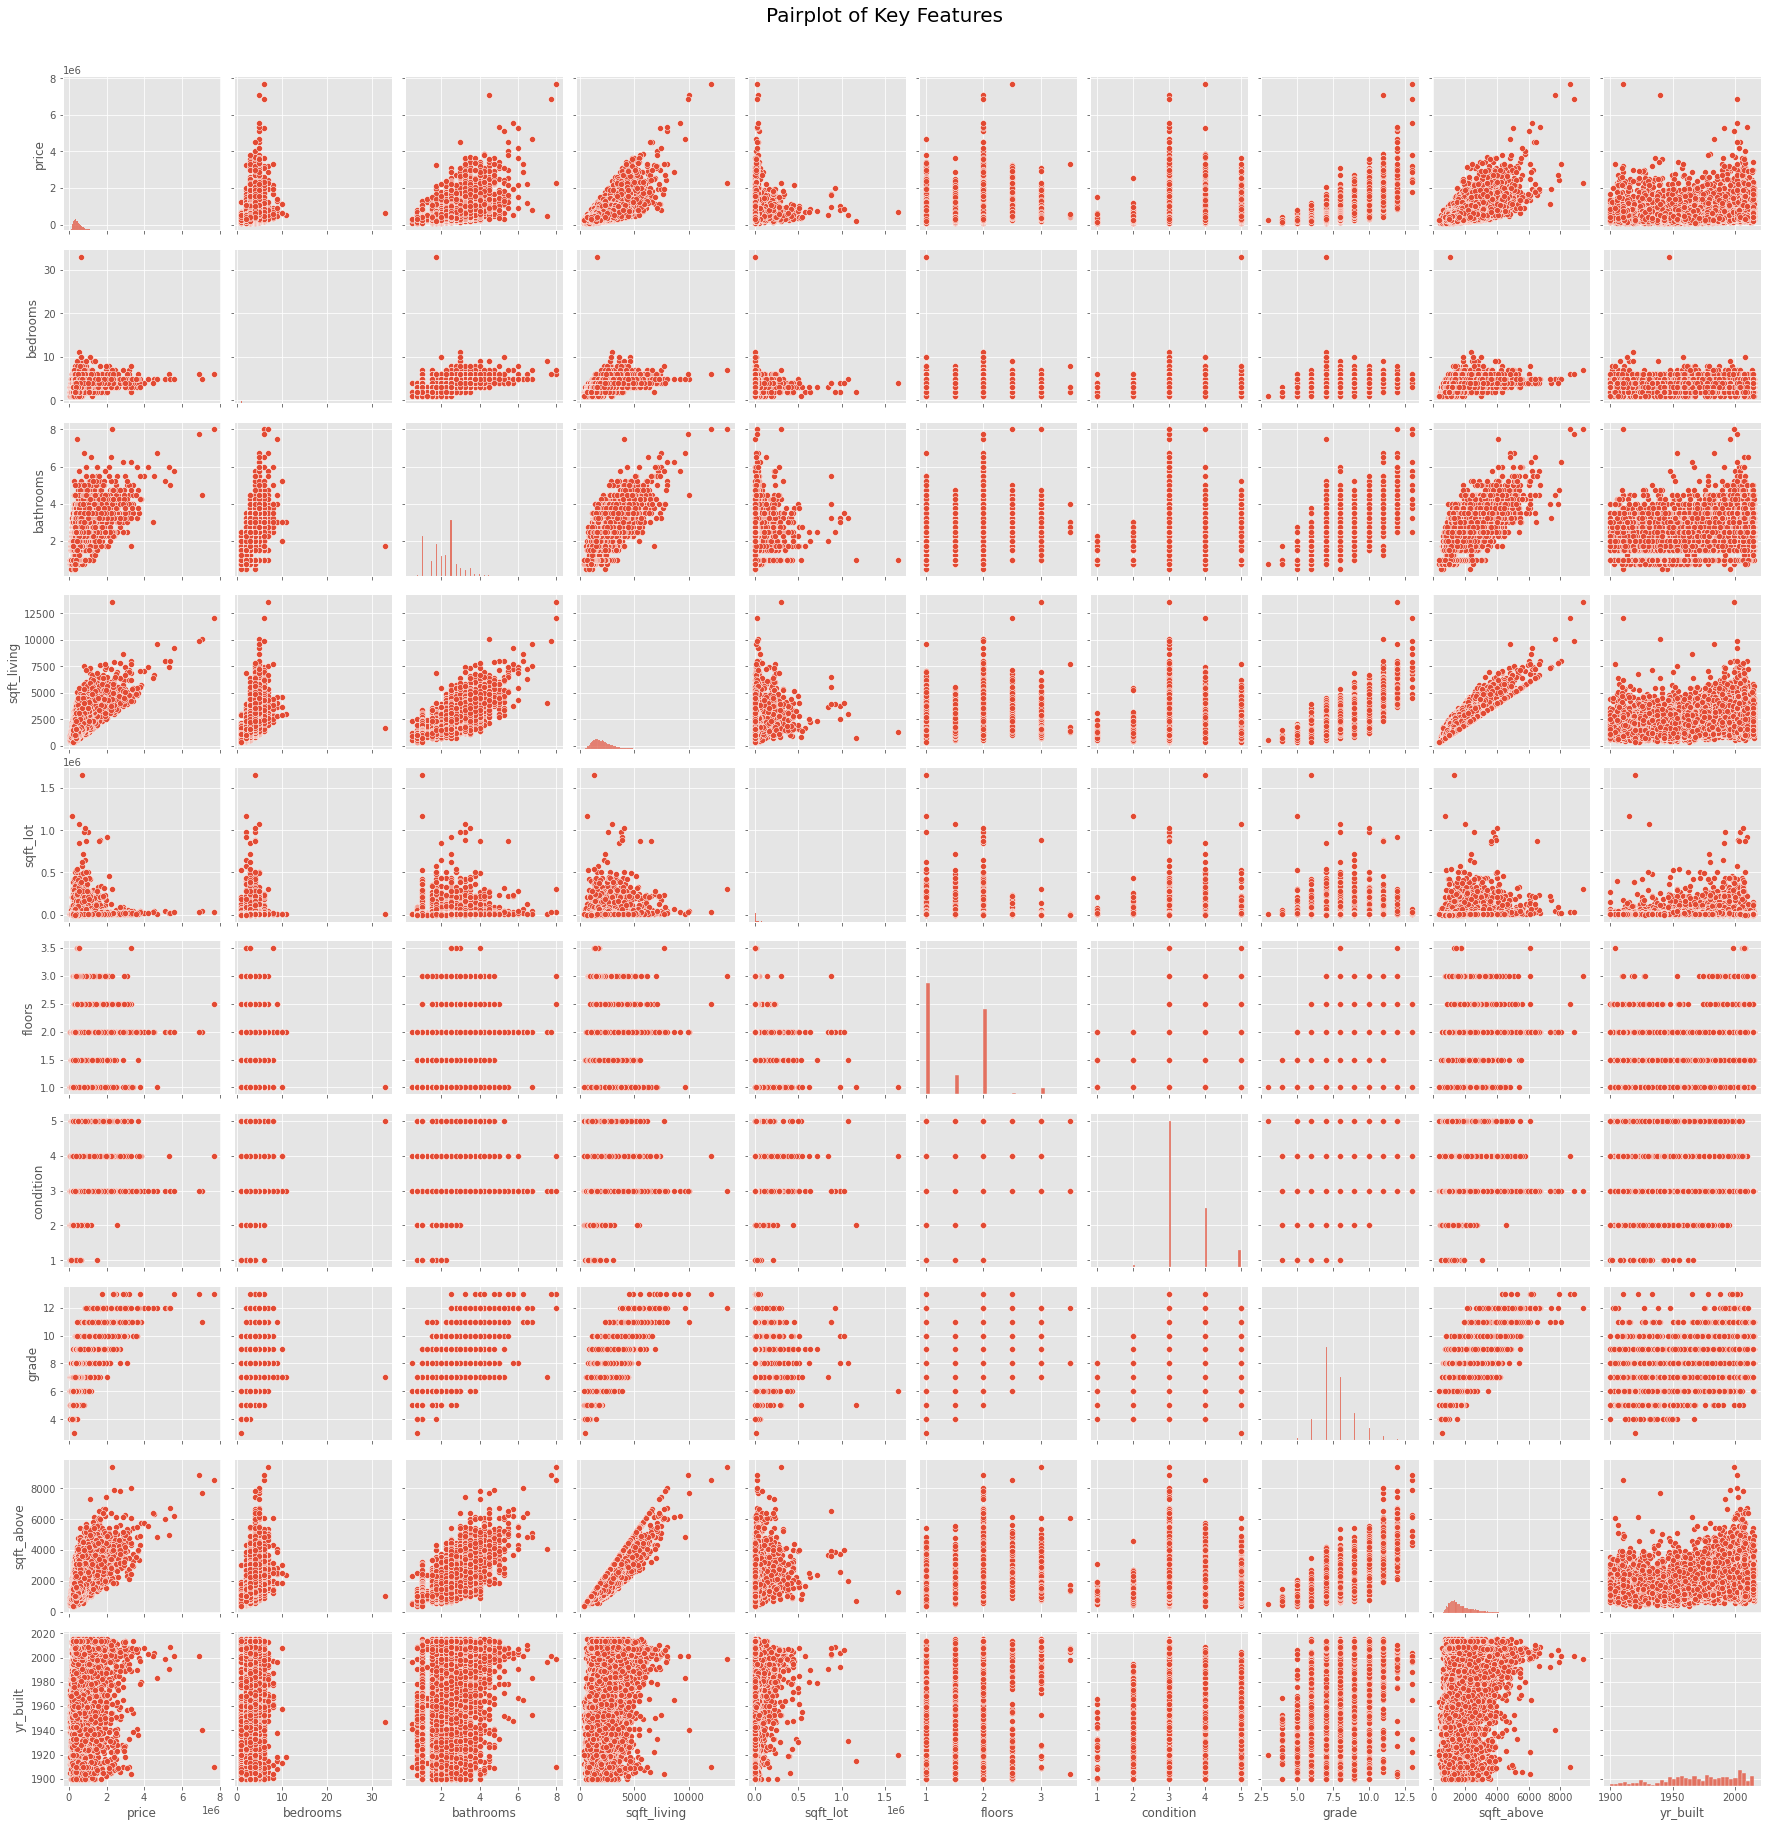

In [26]:
## Explore relationships between key features and the target variable
sns.pairplot(data)
plt.suptitle("Pairplot of Key Features", y=1.02, size=20)
plt.show()

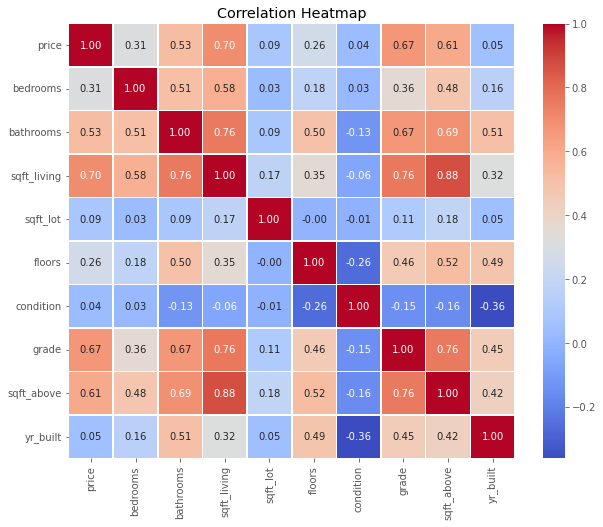

In [11]:
## Correlation heatmap to visualize the correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [12]:
# observing correlation between all continous variables sqft_living and sqft_above has really high which can intrupt the model to predict target variable.

In [13]:
# checking and removing outliers

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define a boolean mask to identify outliers
outlier_mask = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

# Remove outliers
data_c= data[~outlier_mask.any(axis=1)]

# Display the shape of the original and cleaned datasets
print("Original dataset shape:", data.shape)
print("Cleaned dataset shape:", data_c.shape)

Original dataset shape: (21597, 10)
Cleaned dataset shape: (16966, 10)


In [14]:
data_c.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1955
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1951
2,180000.0,2,1.00,770,10000,1.0,3,6,770,1933
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1965
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1987


In [17]:
# Defining target_column 'price' and using that for y axis
X = data_c.drop('price', axis=1)
y = data_c['price']

## Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# checking mean Squared Error for training and test dataset

## Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a baseline linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

## Model Evaluation
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Training Set Evaluation:")
print(f'Mean Squared Error: {mse_train}')
print(f'R-squared: {r2_train}')

print("\nTesting Set Evaluation:")
print(f'Mean Squared Error: {mse_test}')
print(f'R-squared: {r2_test}')


Training Set Evaluation:
Mean Squared Error: 17819974183.106804
R-squared: 0.5135925539052463

Testing Set Evaluation:
Mean Squared Error: 17405423714.955864
R-squared: 0.5183277664643589


In [19]:
# Base line model without processed data
## Statsmodels for additional analysis

features1 = ['const'] + list(X.columns) # exclude last column label
X_train_with_intercept = sm.add_constant(X_train)
stats_model = sm.OLS(y_train, X_train_with_intercept).fit()
adjusted_r_squared = stats_model.rsquared_adj
print("\nAdjusted R-squared (Statsmodels):", adjusted_r_squared)
stats_model.summary(xname=features1)


Adjusted R-squared (Statsmodels): 0.5132697647137663


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     1591.
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:59:20   Log-Likelihood:            -1.7943e+05
No. Observations:               13572   AIC:                         3.589e+05
Df Residuals:                   13562   BIC:                         3.590e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.543e+05   1146.327    396.335      0.000    4.52e+05    4.57e+05
bedrooms    -1.341e+04   1489.338     -9.003      0.000   -1.63e+04   -1.05e+04
bathrooms     1.29e+04   1929.302      6.684      0.000    9113.748    1.67e+04
sqft_living  7.977e+04   2627.356     30.361      0.000    7.46e+04    8.49e+04
sqft_lot    -2.332e+04   1386.536    -16.816      0.000    -2.6e+04   -2.06e+04
floors       1.315e+04   1812.166      7.259      0.000    9601.570    1.67e+04
condition    1.217e+04   1263.583      9.635      0.000    9697.677    1.47e+04
grade        9.188e+04   1651.866     55.622      0.000    8.86e+04    9.51e+04
sqft_above   -1.21e+04   2422.538     -4.993      0.000   -1.68e+04   -7347.623
yr_built     -8.19e+04   1603.638    -51.072      0.000    -8.5e+04   -7.88e+04
==============================================================================
Omnibus:                      741.674   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1095.377
Skew:                           0.484   Prob(JB):                    1.39e-238
Kurtosis:                       4.000   Cond. No.                         6.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

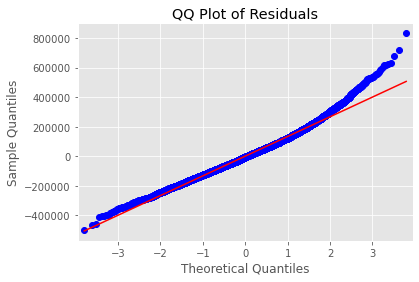

<Figure size 576x432 with 0 Axes>

In [35]:
## Validate assumptions
# QQ Plot
residuals = y_train - y_pred_train
qqplot(residuals, line='s')
plt.title("QQ Plot of Residuals")
plt.figure(figsize=(8, 6))
plt.show()


In [36]:
# Heteroscedasticity test
het_test = diagnostic.het_breuschpagan(residuals, X_train_with_intercept)
print("\nHeteroscedasticity Test:")
print("LM Statistic:", het_test[0])
print("p-value:", het_test[1])


Heteroscedasticity Test:
LM Statistic: 670.5015140380729
p-value: 1.5140500165010818e-138


In [37]:
# Homoscedasticity test
homoscedasticity_test = diagnostic.het_goldfeldquandt(residuals, X_train_with_intercept)
print("\nHomoscedasticity Test:")
print("F Statistic:", homoscedasticity_test[0])
print("p-value:", homoscedasticity_test[1])


Homoscedasticity Test:
F Statistic: 1.0046216796230454
p-value: 0.42474278064044696


In [38]:
#Observations

#The results from the two tests seem contradictory.
#The Breusch-Pagan test strongly suggests the presence of heteroscedasticity.
#The Goldfeld-Quandt test suggests that there is not enough evidence to conclude the presence of heteroscedasticity.

#It's not uncommon to obtain different results from different heteroscedasticity tests.
#Consider the assumptions and limitations of each test.
#The sample size and characteristics of the data might influence the results.

In [39]:
# Approximately 51.4% of the variability in the dependent variable ("price") is explained by the independent variables
# p-values are very close to zero, indicating that all the coefficients are statistically significant
# till now top correlations features are sqft_leaving, grade and yr_built

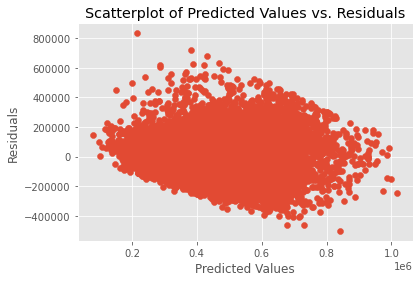

In [20]:
# Get predicted values
predicted_values = stats_model.fittedvalues

# Plot predicted values vs. residuals
plt.scatter(predicted_values, stats_model.resid)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Scatterplot of Predicted Values vs. Residuals")
plt.show()


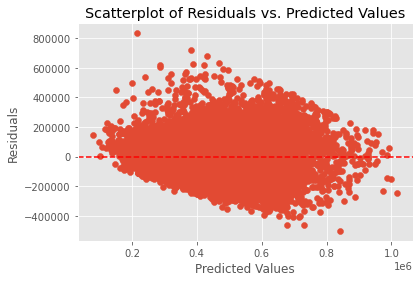

In [21]:
# Plot residuals vs. predicted values
plt.scatter(predicted_values, stats_model.resid)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Scatterplot of Residuals vs. Predicted Values")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()


In [22]:
#In a homoscedastic model, you'd expect the spread of residuals to be approximately constant across 
#all levels of predicted values.

In [23]:
#The skewness and kurtosis values of the residuals are 3.353 and 39.007, respectively
#Interpretation: These values indicate non-normality and heavy tails in the distribution of residuals. 
#That is why have to investigate this further and consider transformations or additional variable selection.

In [26]:
## Identify multicollinearity of features and remove them
# Perform correlation analysis
correlation_matrix = X.corr()
high_correlation = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            high_correlation.add(colname)

# Remove highly correlated features
X_no_multicollinearity = X.drop(columns=high_correlation)


In [27]:
# there was multicolinearity between two continous variable sqft_leaving and sqft_above very high that is why we dropped column sqft_above.

In [28]:
X_no_multicollinearity

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
0,3,1.00,1180,5650,1.0,3,7,1955
1,3,2.25,2570,7242,2.0,3,7,1951
2,2,1.00,770,10000,1.0,3,6,1933
3,4,3.00,1960,5000,1.0,5,7,1965
4,3,2.00,1680,8080,1.0,3,8,1987
...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,3,8,2009
21593,4,2.50,2310,5813,2.0,3,8,2014
21594,2,0.75,1020,1350,2.0,3,7,2009
21595,3,2.50,1600,2388,2.0,3,8,2004


In [29]:
# sqft_above features has beern dropped because correlation value was > 0.7

In [31]:
data_c['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 1995, 1963, 1960, 2003, 1942, 1977,
       1900, 1979, 1994, 1916, 1921, 1969, 1947, 1985, 1941, 1915, 1909,
       1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000, 2014, 1922, 1959,
       1966, 1953, 1950, 1927, 2008, 1968, 1991, 1954, 1973, 1925, 1972,
       1956, 1992, 1964, 1952, 1961, 2006, 1988, 1962, 1939, 1946, 1967,
       1975, 1910, 1978, 1984, 1905, 1980, 1971, 2001, 2010, 1945, 1924,
       1990, 1926, 2004, 1986, 1923, 1976, 1999, 1901, 1949, 1993, 1920,
       2007, 1943, 1983, 1940, 1918, 1928, 1974, 1911, 1937, 1908, 1931,
       1957, 1998, 1913, 2013, 2002, 1907, 1997, 1958, 2012, 1989, 2011,
       1917, 1944, 1902, 2009, 1903, 1970, 1982, 1914, 2015, 1934, 1912,
       1938, 1919, 1932, 1906, 1936, 1935], dtype=int64)

In [34]:
# applying one hot encoding and creating dummies for categorical columns

# Define bins and labels for 'yr_built'
bins = [1900, 1950, 1970, 1990, 2010, 2023]  # You can adjust these based on your data
labels = ['1900-1950', '1951-1970', '1971-1990', '1991-2010', '2011-2023']

# Create a new column 'yr_built_group' with the specified bins and labels
X_no_multicollinearity['yr_built_group'] = pd.cut(X_no_multicollinearity['yr_built'], bins=bins, labels=labels, include_lowest=True)

# Create dummy variables for all categorical columns including the grouped 'yr_built'
categorical_columns_with_grouped_yr_built = ['bedrooms', 'bathrooms', 'floors', 'grade','condition', 'yr_built_group']

X_with_dummies = pd.get_dummies(X_no_multicollinearity, columns=categorical_columns_with_grouped_yr_built, drop_first=True)

X_with_dummies = X_with_dummies.drop('yr_built', axis=1)


In [36]:
## Run statsmodel and capture adjusted R-Squared

X_train_v1, X_test_v1, y_train_v1, y_test_v1 = train_test_split(X_with_dummies, y, test_size=0.2, random_state=42)
X_train_with_intercept_v1 = sm.add_constant(X_train_v1)
stats_model_v1 = sm.OLS(y_train, X_train_with_intercept_v1).fit()
adjusted_r_squared_v1 = stats_model_v1.rsquared_adj
print("\nAdjusted R-squared (Version 1):", adjusted_r_squared_v1)
stats_model_v1.summary()


Adjusted R-squared (Version 1): 0.5135166053714014


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     463.1
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:20:48   Log-Likelihood:            -1.7942e+05
No. Observations:               13572   AIC:                         3.589e+05
Df Residuals:                   13540   BIC:                         3.591e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     2.291e+05   3.41e+04      6.718      0.000    1.62e+05    2.96e+05
sqft_living                112.7332      3.207     35.148      0.000     106.446     119.020
sqft_lot                    -6.4690      0.419    -15.443      0.000      -7.290      -5.648
bedrooms_3               -2.108e+04   3916.930     -5.383      0.000   -2.88e+04   -1.34e+04
bedrooms_4               -3.397e+04   4714.739     -7.204      0.000   -4.32e+04   -2.47e+04
bedrooms_5               -4.231e+04   6796.180     -6.225      0.000   -5.56e+04    -2.9e+04
bathrooms_1.0            -3.607e+04   3.08e+04     -1.173      0.241   -9.63e+04    2.42e+04
bathrooms_1.25            3.703e+04    8.3e+04      0.446      0.656   -1.26e+05       2e+05
bathrooms_1.5            -2.689e+04    3.1e+04     -0.868      0.385   -8.76e+04    3.38e+04
bathrooms_1.75           -1.199e+04   3.09e+04     -0.389      0.698   -7.25e+04    4.85e+04
bathrooms_2.0            -1.686e+04   3.09e+04     -0.545      0.586   -7.75e+04    4.38e+04
bathrooms_2.25            -335.4588   3.11e+04     -0.011      0.991   -6.12e+04    6.06e+04
bathrooms_2.5            -1.298e+04   3.11e+04     -0.418      0.676   -7.39e+04    4.79e+04
bathrooms_2.75            7771.7406   3.14e+04      0.248      0.804   -5.37e+04    6.92e+04
bathrooms_3.0             -353.4464   3.17e+04     -0.011      0.991   -6.25e+04    6.18e+04
bathrooms_3.25            2.458e+04   3.24e+04      0.758      0.448   -3.89e+04    8.81e+04
bathrooms_3.5             6.062e+04   3.22e+04      1.882      0.060   -2512.913    1.24e+05
floors_1.5                1.564e+04   4660.064      3.356      0.001    6504.096    2.48e+04
floors_2.0               -1904.6606   3979.950     -0.479      0.632   -9705.917    5896.596
floors_2.5                4.743e+04   1.71e+04      2.773      0.006    1.39e+04     8.1e+04
floors_3.0                5.959e+04   7968.535      7.479      0.000     4.4e+04    7.52e+04
floors_3.5                6.832e+04   5.48e+04      1.247      0.213   -3.91e+04    1.76e+05
grade_7                   1.062e+05   4361.530     24.341      0.000    9.76e+04    1.15e+05
grade_8                   2.131e+05   5200.924     40.983      0.000    2.03e+05    2.23e+05
grade_9                   3.419e+05   6658.685     51.348      0.000    3.29e+05    3.55e+05
condition_3               5.175e+04   1.44e+04      3.598      0.000    2.36e+04    7.99e+04
condition_4               7.109e+04   1.44e+04      4.923      0.000    4.28e+04    9.94e+04
condition_5               9.494e+04   1.48e+04      6.395      0.000    6.58e+04    1.24e+05
yr_built_group_1951-1970 -9.942e+04   3871.937    -25.678      0.000   -1.07e+05   -9.18e+04
yr_built_group_1971-1990 -1.552e+05   4351.293    -35.674      0.000   -1.64e+05   -1.47e+05
yr_built_group

In [37]:
# Get the p-values for each coefficient
p_values = stats_model_v1.pvalues

# Identify columns with p-values greater than 0.05
columns_to_drop = p_values[p_values > 0.05].index

# Drop the identified columns from the DataFrame
X_filtered = X_with_dummies.drop(columns=columns_to_drop)

# Re-run the model with the filtered features
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y, test_size=0.2, random_state=42)
X_train_with_intercept_filtered = sm.add_constant(X_train_filtered)
stats_model_filtered = sm.OLS(y_train_filtered, X_train_with_intercept_filtered).fit()
adjusted_r_squared_filtered = stats_model_filtered.rsquared_adj
print("\nAdjusted R-squared (Filtered):", adjusted_r_squared_filtered)
stats_model_filtered.summary()



Adjusted R-squared (Filtered): 0.5092095740237206


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     783.2
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:20:58   Log-Likelihood:            -1.7948e+05
No. Observations:               13572   AIC:                         3.590e+05
Df Residuals:                   13553   BIC:                         3.591e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.863e+05    1.5e+04     12.385      0.000    1.57e+05    2.16e+05
sqft_living                123.4656      2.911     42.410      0.000     117.759     129.172
sqft_lot                    -6.9110      0.411    -16.797      0.000      -7.717      -6.104
bedrooms_3               -1.706e+04   3853.290     -4.427      0.000   -2.46e+04   -9506.258
bedrooms_4               -2.941e+04   4631.543     -6.350      0.000   -3.85e+04   -2.03e+04
bedrooms_5               -3.298e+04   6721.076     -4.907      0.000   -4.62e+04   -1.98e+04
floors_1.5                1.339e+04   4576.882      2.927      0.003    4423.196    2.24e+04
floors_2.5                 5.22e+04   1.69e+04      3.087      0.002     1.9e+04    8.53e+04
floors_3.0                6.626e+04   7116.223      9.310      0.000    5.23e+04    8.02e+04
grade_7                   1.094e+05   4273.233     25.611      0.000    1.01e+05    1.18e+05
grade_8                   2.186e+05   5068.131     43.140      0.000    2.09e+05    2.29e+05
grade_9                   3.457e+05   6607.775     52.316      0.000    3.33e+05    3.59e+05
condition_3               5.118e+04   1.44e+04      3.544      0.000    2.29e+04    7.95e+04
condition_4               7.178e+04   1.45e+04      4.951      0.000    4.34e+04       1e+05
condition_5               9.839e+04   1.49e+04      6.605      0.000    6.92e+04    1.28e+05
yr_built_group_1951-1970 -9.859e+04   3831.788    -25.729      0.000   -1.06e+05   -9.11e+04
yr_built_group_1971-1990 -1.478e+05   4161.060    -35.519      0.000   -1.56e+05    -1.4e+05
yr_built_group_1991-2010 -1.923e+05   4290.948    -44.817      0.000   -2.01e+05   -1.84e+05
yr_built_group_2011-2023 -1.896e+05   6438.413    -29.450      0.000   -2.02e+05   -1.77e+05
==============================================================================
Omnibus:                      731.505   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1077.114
Skew:                           0.480   Prob(JB):                    1.28e-234
Kurtosis:                       3.991   Cond. No.                     2.04e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# dropping the columns which has p value > 0.05
# After creating the dummies there was not much changed in R-SQUARED value
# Targate variable has direct effect of the independant variable same as baseline model sqft_living, grade_9 and yr_built_group_1991-2010

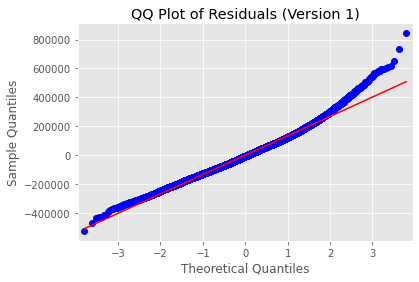

In [39]:
## Check the QQ plot
residuals_v1 = y_train - stats_model_filtered.fittedvalues
qqplot(residuals_v1, line='s')
plt.title("QQ Plot of Residuals (Version 1)")
plt.show()


In [116]:
#observation
#p-value < 0.05, indicating that they are likely important in predicting the target variable. 
#The F-statistic tests the overall significance of the model. The associated p-value is near zero
#suggesting that at least one predictor in the model has a non-zero coefficient.

In [41]:
# concating target variable with dummies data

data_c_filtered = pd.concat([y,X_filtered],axis=1)
data_c_filtered

,price,sqft_living,sqft_lot,bedrooms_3,bedrooms_4,bedrooms_5,floors_1.5,floors_2.5,floors_3.0,grade_7,grade_8,grade_9,condition_3,condition_4,condition_5,yr_built_group_1951-1970,yr_built_group_1971-1990,yr_built_group_1991-2010,yr_built_group_2011-2023
0,221900.0,1180,5650,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1,538000.0,2570,7242,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
2,180000.0,770,10000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,604000.0,1960,5000,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0
4,510000.0,1680,8080,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530,1131,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0
21593,400000.0,2310,5813,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
21594,402101.0,1020,1350,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
21595,400000.0,1600,2388,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [48]:
## Log transformation and feature scaling for continuous variables

continuous_columns =['price','sqft_living','sqft_lot']
X_continuous = data_c_filtered[continuous_columns]
X_log_transformed = np.log1p(X_continuous)

X_categorical_withdummies = data_c_filtered.drop(columns=continuous_columns)

# Combine log-transformed continuous features and categorical features
X_combined = pd.concat([X_log_transformed, X_categorical_withdummies], axis=1)

temp_x = X_combined.drop('price', axis=1)

# Perform feature scaling on the log-transformed continuous features
scaler_v2 = StandardScaler()
X_scaled_v2 = scaler_v2.fit_transform(temp_x)
X_scaled_v2

array([[-1.10688574, -0.14960497,  1.00697944, ..., -0.50577714,
        -0.56804817, -0.23557025],
       [ 1.09453238,  0.26313947,  1.00697944, ..., -0.50577714,
        -0.56804817, -0.23557025],
       [-2.31360512,  0.79968354, -0.99306893, ..., -0.50577714,
        -0.56804817, -0.23557025],
       ...,
       [-1.51884934, -2.52923856, -0.99306893, ..., -0.50577714,
         1.76041408, -0.23557025],
       [-0.24586259, -1.58131825,  1.00697944, ..., -0.50577714,
         1.76041408, -0.23557025],
       [-1.51884934, -2.90616794, -0.99306893, ..., -0.50577714,
         1.76041408, -0.23557025]])

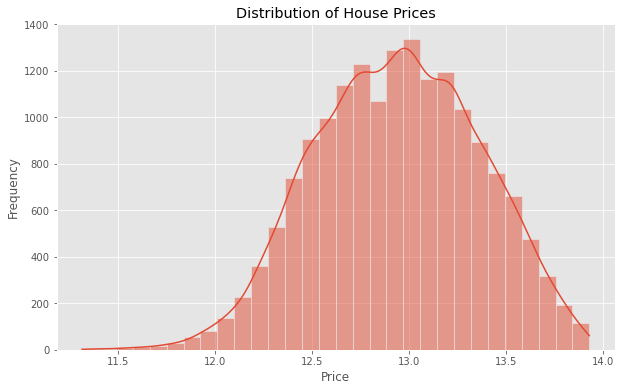

In [72]:
## Distribution of the target variable 'price' after log transformation
plt.figure(figsize=(10, 6))
sns.histplot(X_log_transformed['price'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [49]:
# Separate the target variable 'price'
y_v2 = data_c['price']

# Split into training and testing sets for features and target variable
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_scaled_v2, y_v2, test_size=0.2, random_state=42)

model_v2 = LinearRegression()
model_v2.fit(X_train_v2, y_train_v2)

y_pred_train_v2 = model_v2.predict(X_train_v2)
mse_train_v2 = mean_squared_error(y_train_v2, y_pred_train_v2)
r2_train_v2 = r2_score(y_train_v2, y_pred_train_v2)

y_pred_test_v2 = model_v2.predict(X_test_v2)
mse_test_v2 = mean_squared_error(y_test_v2, y_pred_test_v2)
r2_test_v2 = r2_score(y_test_v2, y_pred_test_v2)

print("Training Set Evaluation:")
print(f'Mean Squared Error: {mse_train_v2}')
print(f'R-squared: {r2_train_v2}')

print("\nTesting Set Evaluation:")
print(f'Mean Squared Error: {mse_test_v2}')
print(f'R-squared: {r2_test_v2}')



Training Set Evaluation:
Mean Squared Error: 17991593852.66511
R-squared: 0.508908086671359

Testing Set Evaluation:
Mean Squared Error: 17857609549.608692
R-squared: 0.5058141175858628


In [50]:
features = ['const'] + list(temp_x.columns) # exclude last column label

# Capture Adjusted R-squared using statsmodels for Version 2
stats_model_v2 = sm.OLS(y_train_v2, sm.add_constant(X_train_v2)).fit()
adjusted_r_squared_v2 = stats_model_v2.rsquared_adj

# Identify key features for Version 2
key_features_v2 = temp_x.columns[np.abs(model_v2.coef_) > 0.1]
stats_model_v2.summary(xname=features)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     780.3
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:34:56   Log-Likelihood:            -1.7950e+05
No. Observations:               13572   AIC:                         3.590e+05
Df Residuals:                   13553   BIC:                         3.592e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     4.545e+05   1152.317    394.459      0.000    4.52e+05    4.57e+05
sqft_living               8.054e+04   1912.187     42.120      0.000    7.68e+04    8.43e+04
sqft_lot                 -2.986e+04   1604.897    -18.605      0.000    -3.3e+04   -2.67e+04
bedrooms_3               -1.298e+04   1981.767     -6.548      0.000   -1.69e+04   -9091.279
bedrooms_4               -1.538e+04   2198.948     -6.992      0.000   -1.97e+04   -1.11e+04
bedrooms_5               -6953.3761   1615.623     -4.304      0.000   -1.01e+04   -3786.531
floors_1.5                1812.4153   1316.509      1.377      0.169    -768.125    4392.956
floors_2.5                2368.3951   1163.324      2.036      0.042      88.118    4648.673
floors_3.0                5940.7104   1314.895      4.518      0.000    3363.334    8518.087
grade_7                   4.613e+04   2191.355     21.050      0.000    4.18e+04    5.04e+04
grade_8                   9.206e+04   2422.195     38.007      0.000    8.73e+04    9.68e+04
grade_9                   1.053e+05   2030.602     51.881      0.000    1.01e+05    1.09e+05
condition_3               2.432e+04   6910.009      3.519      0.000    1.08e+04    3.79e+04
condition_4               3.109e+04   6413.397      4.847      0.000    1.85e+04    4.37e+04
condition_5               2.628e+04   4060.437      6.472      0.000    1.83e+04    3.42e+04
yr_built_group_1951-1970 -4.328e+04   1645.615    -26.299      0.000   -4.65e+04   -4.01e+04
yr_built_group_1971-1990 -6.157e+04   1662.380    -37.037      0.000   -6.48e+04   -5.83e+04
yr_built_group_1991-2010 -8.637e+04   1867.485    -46.249      0.000      -9e+04   -8.27e+04
yr_built_group_2011-2023 -4.412e+04   1451.383    -30.398      0.000    -4.7e+04   -4.13e+04
==============================================================================
Omnibus:                      713.538   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1027.241
Skew:                           0.479   Prob(JB):                    8.66e-224
Kurtosis:                       3.948   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Fit the model with scaled features
model_v2 = LinearRegression()
model_v2.fit(X_scaled_v2, y_v2)

# Get the absolute coefficients of the features
feature_importance = np.abs(model_v2.coef_)

# Identify the indices of the top features (e.g., top 5 features)
num_top_features = 5  # Adjust this based on your preference
top_feature_indices = np.argsort(feature_importance)[-num_top_features:]

# Get the names of the top features
key_features_v3 = temp_x.columns[top_feature_indices]

# Print or store the identified key features
print("Key Features in Iteration 3:", key_features_v3)

Key Features in Iteration 3: Index(['yr_built_group_1971-1990', 'sqft_living', 'yr_built_group_1991-2010',
       'grade_8', 'grade_9'],
      dtype='object')


In [ ]:
# so clearly we can say after 3 iteration sqft_living,yr_built and grade are the top features using which we can predict the price of house

In [52]:
# Check if the model is underfitting or overfitting
if mse_train_v2 < mse_test_v2:
    print("\nThe model is potentially overfitting.")
elif mse_train_v2 > mse_test_v2:
    print("\nThe model is potentially underfitting.")
else:
    print("\nThe model shows consistent performance on both training and validation sets.")



The model is potentially underfitting.


In [53]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_v2, y_train_v2)

LinearRegression()

In [54]:
LinearRegression()

LinearRegression()

In [55]:
# coefficients
linreg.coef_

array([ 80540.81751406, -29858.35607817, -12975.81735343, -15375.42006425,
        -6953.3760749 ,   1812.41534507,   2368.39513581,   5940.71037831,
        46126.98195525,  92059.70366115, 105349.92702654,  24319.02669217,
        31088.55129032,  26279.32131124, -43278.28366963, -61569.87563081,
       -86368.54215346, -44119.79246242])

In [56]:
# intercept
linreg.intercept_

454541.8402111628

In [57]:
# getting the used column names for the df

used_cols = [*temp_x]
used_cols

['sqft_living',
 'sqft_lot',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'floors_1.5',
 'floors_2.5',
 'floors_3.0',
 'grade_7',
 'grade_8',
 'grade_9',
 'condition_3',
 'condition_4',
 'condition_5',
 'yr_built_group_1951-1970',
 'yr_built_group_1971-1990',
 'yr_built_group_1991-2010',
 'yr_built_group_2011-2023']

In [58]:
# creating an empty dataframe for the new row
new_row = pd.DataFrame(columns=used_cols)

In [59]:
coefficients = [454541.840211, 80540.817514, -29858.356078, -12975.817353, -15375.420064, -6953.376075,1812.415345, 2368.395136, 5940.710378, 46126.981955, 92059.703661, 105349.927027, 24319.026692, 31088.551290, 26279.321311, -43278.283670, -61569.875631, -86368.542153, -44119.792462]
coefficients

[454541.840211,
 80540.817514,
 -29858.356078,
 -12975.817353,
 -15375.420064,
 -6953.376075,
 1812.415345,
 2368.395136,
 5940.710378,
 46126.981955,
 92059.703661,
 105349.927027,
 24319.026692,
 31088.55129,
 26279.321311,
 -43278.28367,
 -61569.875631,
 -86368.542153,
 -44119.792462]

In [60]:
X_combined.head()

,price,sqft_living,sqft_lot,bedrooms_3,bedrooms_4,bedrooms_5,floors_1.5,floors_2.5,floors_3.0,grade_7,grade_8,grade_9,condition_3,condition_4,condition_5,yr_built_group_1951-1970,yr_built_group_1971-1990,yr_built_group_1991-2010,yr_built_group_2011-2023
0,12.309987,7.074117,8.639588,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1,13.195616,7.852050,8.887791,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
2,12.100718,6.647688,9.210440,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,13.311331,7.581210,8.517393,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0
4,13.142168,7.427144,8.997271,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [61]:
# adding the details provided into the empty dataframe
new_row = new_row.append({
                            'sqft_living': 7.074117,
                            'sqft_lot': 8.639588,
                            'bedrooms_3': 1,
                            'bedrooms_4': 0,
                            'bedrooms_5': 0,
                            'floors_1.5': 0,
                            'floors_2.5': 0,
                            'floors_3.0': 0,
                            'grade_7': 1,
                            'grade_8': 0,
                            'grade_9': 0,
                            'condition_3': 1,
                            'condition_4': 0,
                            'condition_5': 0,
                            'yr_built_group_1951-1970': 1,
                            'yr_built_group_1971-1990': 0,
                            'yr_built_group_1991-2010': 0,
                            'yr_built_group_2011-2023': 0
                        },
                          ignore_index=True)
new_row

,sqft_living,sqft_lot,bedrooms_3,bedrooms_4,bedrooms_5,floors_1.5,floors_2.5,floors_3.0,grade_7,grade_8,grade_9,condition_3,condition_4,condition_5,yr_built_group_1951-1970,yr_built_group_1971-1990,yr_built_group_1991-2010,yr_built_group_2011-2023
0,7.074117,8.639588,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [62]:
# Add a constant term to the test data
new_row_with_const = sm.add_constant(new_row)

# Predict the price using the model and the test data
predicted_price = sm.OLS(pd.Series([coefficients[0]]), new_row_with_const.dot(coefficients[1:])).fit().predict()

# Print the predicted price
print(f"Predicted Price: ${predicted_price[0]:,.2f}")

# Assuming predicted_price is the variable containing the predicted price
log_predicted_price = np.log(predicted_price)

# Print the result
print(f"Log of Predicted Price: {log_predicted_price}")


Predicted Price: $454,541.84
Log of Predicted Price: [13.02704525]


In [63]:
# Assuming new_row_with_const has only one row
predicted_price_single = np.dot(new_row_with_const.values, coefficients[1:])

# Print the predicted price for the single instance
print(f"Predicted Price: ${predicted_price_single[0]:,.2f}")

# Assuming predicted_price is the variable containing the predicted price
log_predicted_price = np.log(predicted_price_single)

# Print the result
print(f"Log of Predicted Price: {log_predicted_price}")


Predicted Price: $325,983.18
Log of Predicted Price: [12.69460106]


In [69]:
# now - FINALLY - we can model

new_row_pred_log = linreg.predict(new_row)
new_row_pred_log


C:\Users\bijus\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([780525.01933299])

In [70]:
# prediction needs to be scaled and exponentiated
#np.exp(new_row_pred_log) * data_c["price"].std() + data_c["price"].mean()


In [71]:

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [67]:
X = X_combined.drop('price', axis=1)
y = X_combined['price']

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  grade_9                        with p-value 0.0
Add  grade_8                        with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  sqft_lot                       with p-value 7.80376e-137
Add  yr_built_group_1991-2010       with p-value 7.79205e-213
Add  yr_built_group_2011-2023       with p-value 1.37398e-118
Add  yr_built_group_1971-1990       with p-value 2.06259e-170
Add  yr_built_group_1951-1970       with p-value 2.65813e-164
Add  grade_7                        with p-value 5.28142e-198
Add  condition_5                    with p-value 1.30429e-18
Add  condition_4                    with p-value 2.16747e-13
Add  condition_3                    with p-value 5.16297e-09
Add  floors_3.0                     with p-value 7.95519e-06
Add  bedrooms_4                     with p-value 0.000199244
Add  bedrooms_3                     with p-value 4.01455e-08
Add  bedrooms_5                     with p-value 8.95048e-12
resulting features:
['grade_9', 'grade_8',

In [68]:
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     1080.
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:35:19   Log-Likelihood:                -3489.2
No. Observations:               16966   AIC:                             7012.
Df Residuals:                   16949   BIC:                             7144.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        9.8062      0.082    119.542      0.000       9.645       9.967
grade_9                      0.7334      0.013     55.778      0.000       0.708       0.759
grade_8                      0.4943      0.010     47.209      0.000       0.474       0.515
sqft_living                  0.5306      0.011     49.194      0.000       0.510       0.552
sqft_lot                    -0.1213      0.005    -23.202      0.000      -0.132      -0.111
yr_built_group_1991-2010    -0.4179      0.008    -52.030      0.000      -0.434      -0.402
yr_built_group_2011-2023    -0.4262      0.012    -34.328      0.000      -0.451      -0.402
yr_built_group_1971-1990    -0.3328      0.008    -43.317      0.000      -0.348      -0.318
yr_built_group_1951-1970    -0.2345      0.007    -32.888      0.000      -0.249      -0.221
grade_7                      0.2682      0.009     30.755      0.000       0.251       0.285
condition_5                  0.2645      0.030      8.940      0.000       0.207       0.322
condition_4                  0.2092      0.029      7.266      0.000       0.153       0.266
condition_3                  0.1690      0.029      5.894      0.000       0.113       0.225
floors_3.0                   0.0711      0.015      4.800      0.000       0.042       0.100
bedrooms_4                  -0.0873      0.009     -9.274      0.000      -0.106      -0.069
bedrooms_3                  -0.0659      0.008     -8.478      0.000      -0.081      -0.051
bedrooms_5                  -0.0901      0.013     -6.827      0.000      -0.116      -0.064
==============================================================================
Omnibus:                       78.727   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.094
Skew:                          -0.148   Prob(JB):                     1.49e-18
Kurtosis:                       3.170   Cond. No.                         433.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""